# 01. Importing Libraries

In [20]:
# Using .api to import public access version of statsmodels, a library that handles statistical models
# Using last library to handle warnings

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings 

# Disabling deprecation warnings that could indicate, for instance, a suspended library or feature; not task-relevant

warnings.filterwarnings("ignore") 

# Choosing styling option for how plots will appear

plt.style.use('fivethirtyeight')

# 02. Importing Data

In [21]:
# Project folder pathway

path = r'C:\Users\siram\OneDrive\Desktop\data uefa'

In [22]:
path

'C:\\Users\\siram\\OneDrive\\Desktop\\data uefa'

In [23]:
# Importing cleaned housing data

df=pd.read_csv(os.path.join(path,'goals_2.csv'), index_col = False)

# 03. Data Wrangling

In [24]:
# Checking shape

df.shape

(183, 11)

In [25]:
# Checking headers

pd.options.display.max_columns = None
df.head()

,no,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played,year
0,1,15,11,1,3,0,13,2,3,12,2021
1,2,13,8,3,1,1,13,0,3,10,2019
2,3,11,3,4,3,1,11,0,1,8,2022
3,4,8,0,8,0,0,7,1,1,13,2020
4,5,7,3,1,3,0,7,0,0,6,2019


In [27]:
df.head()

,no,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played,year
0,1,15,11,1,3,0,13,2,3,12,2021
1,2,13,8,3,1,1,13,0,3,10,2019
2,3,11,3,4,3,1,11,0,1,8,2022
3,4,8,0,8,0,0,7,1,1,13,2020
4,5,7,3,1,3,0,7,0,0,6,2019


In [28]:
# Creating a new dataframe with median housing prices grouped by dates

data = df.groupby('year').agg({'goals': ['median']})

In [29]:
# Checking headers

data.head()

,goals
,median
year,
2014,1.0
2015,1.0
2016,1.0
2017,1.0
2018,5.0


Date is already set as index

In [30]:
# Checking data types

data.dtypes

goals  median    float64
dtype: object

In [31]:
data

,goals
,median
year,
2014,1.0
2015,1.0
2016,1.0
2017,1.0
2018,5.0
2019,1.0
2020,3.0
2021,3.0


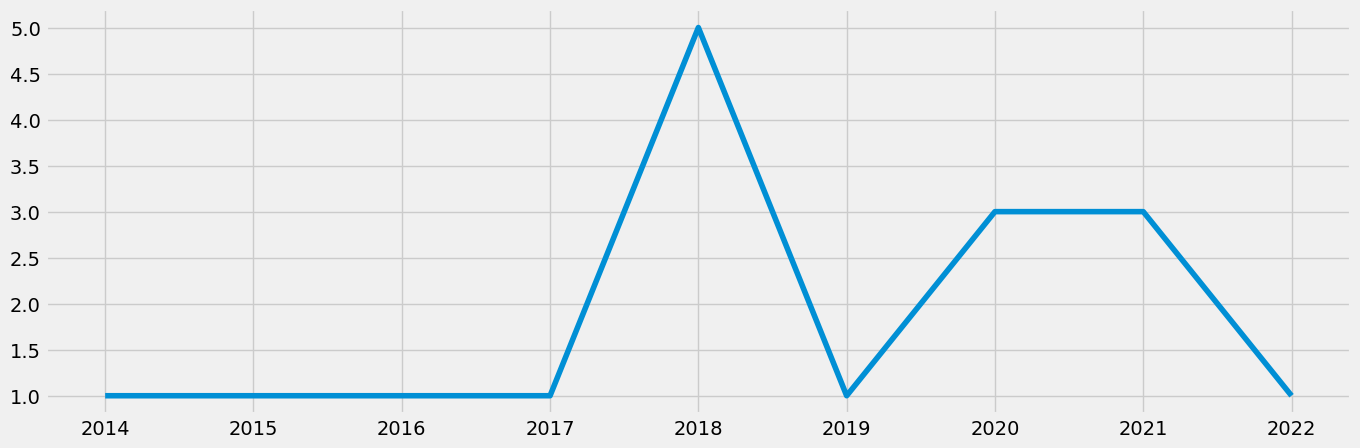

In [18]:
# Plotting the data using matplotlib

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

#### Data cleaning was conducted in prior exercises

# 04. Decomposing Time-Series Data

In [16]:
# Decomposing time series using 

decomp = sm.tsa.seasonal_decompose(data, model='additive')

In [32]:
# Defining a fixed size for all special charts

from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

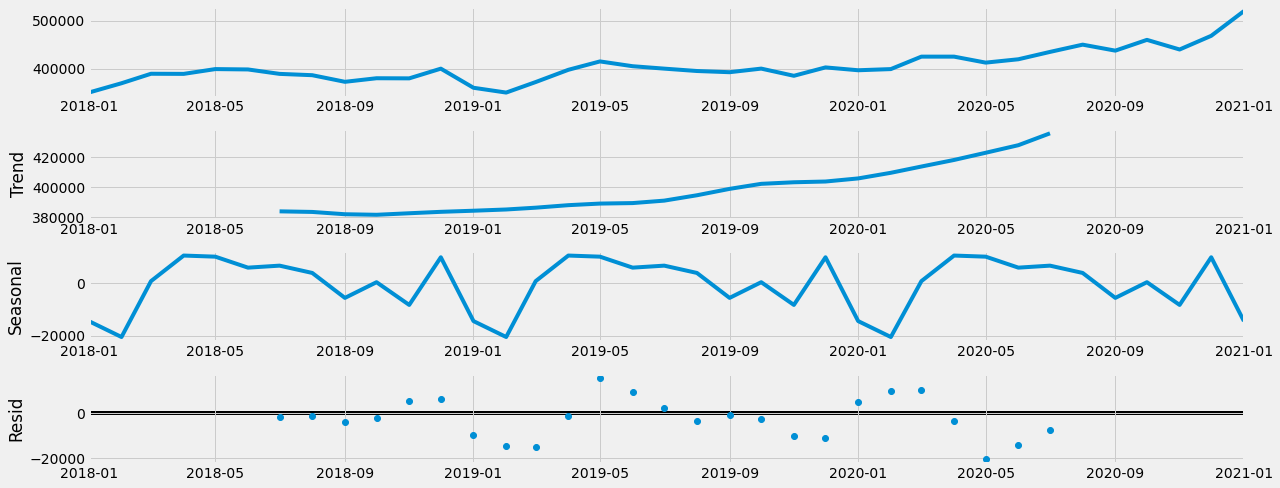

In [18]:
# Plotting decomposition of time-series data

decomp.plot()
plt.show()

The decomposition clearly shows an upward trend of the median.

The plot shows seasonality due to a pattern repeating itself at the same time each year. 

There appears to be some noise from due to data fluctuations.

# 05. Stationarity Test

### a. Dickey-Fuller Test

It is vital data is stationary, otherwise, we will not have a reliable basis to build the forecasting on. A Dickey-Fuller test will be conducted to check for stationarity.

In [33]:
# The adfuller() function imports from the model from statsmodels; but running it will only return an array of numbers
# This is the reason to define a function that prints the correct output from that array

# Importing the adfuller() function

from statsmodels.tsa.stattools import adfuller 

# Performing the Dickey-Fuller test:

def dickey_fuller(timeseries): # Define the function
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['goals'])

Dickey-Fuller Stationarity test:
Test Statistic                -3.162278
p-value                        0.022275
Number of Lags Used            0.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


#### H0 = Presence of a unit root (non-stationary)  
#### HA = Unit root present (stationary)  

The test statistic of -3.162278 is not larger than the critical value (5%) of -3.367187, meaning the null hypothesis can be rejected. Also, the p-value is less than 0.05.

### b. Autocorrelation Test

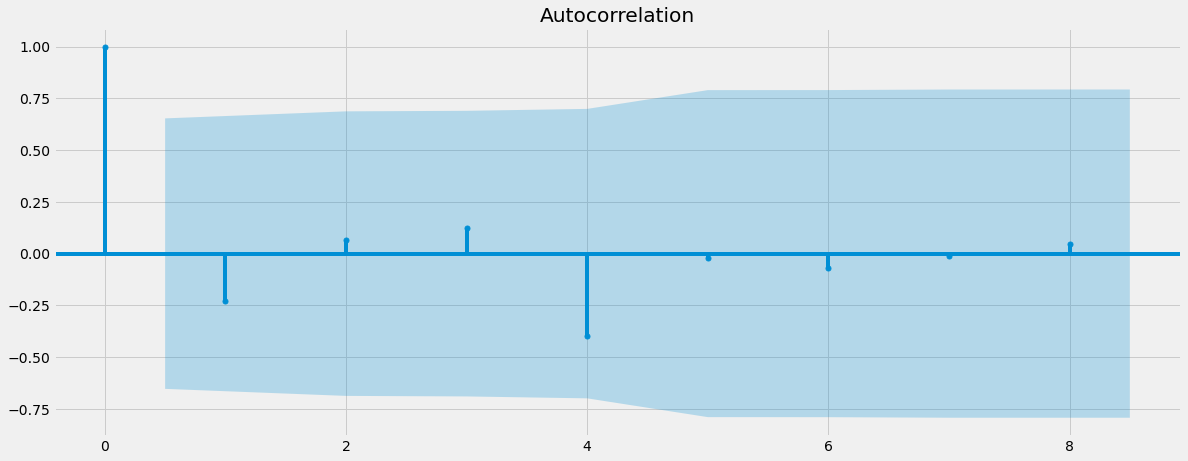

In [34]:
# Checking plot of autocorrelation

# Importing the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data)
plt.show()

The test shows that there are not vertical lines that go above the blue edge of the confidence interval, indicating that the lags are not significantly correlated with each other and the data is stationary.

# 06. Stationarizing Data

In [35]:
# Conducting the first round of differencing by subtracting the previous data point from the current data point
# The df.shift(1) function turns the observation to t-1, making the whole data t - (t -1)

data_diff = data - data.shift(1)

In [36]:
# Removing missing values as a result of differencing

data_diff.dropna(inplace = True)

In [37]:
# Checking values and headers

data_diff.head()

,goals
,median
year,
2015,0.0
2016,0.0
2017,0.0
2018,4.0
2019,-4.0


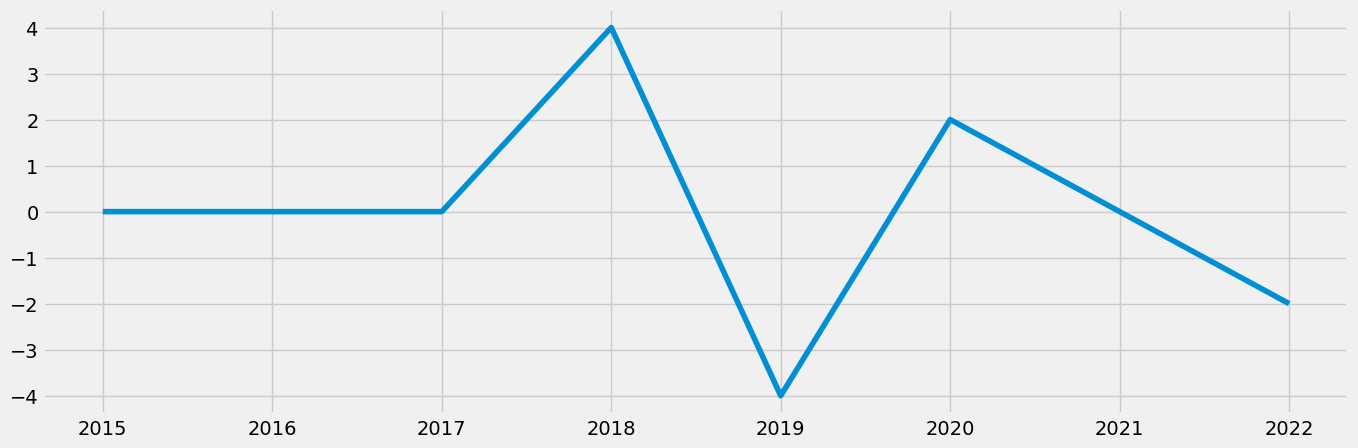

In [38]:
# Checking out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [39]:
# Re-running the Dickey-Fuller Test to check for stationarity

dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -2.997734
p-value                        0.035107
Number of Lags Used            1.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


The results show that the data is now stationary. The test statistic value (-2.997734) is less than the critical value (5%) of -3.646238 and the p-value is smaller than 0.05. Therefore, the test result is significat and the null hypothesis can be rejected.

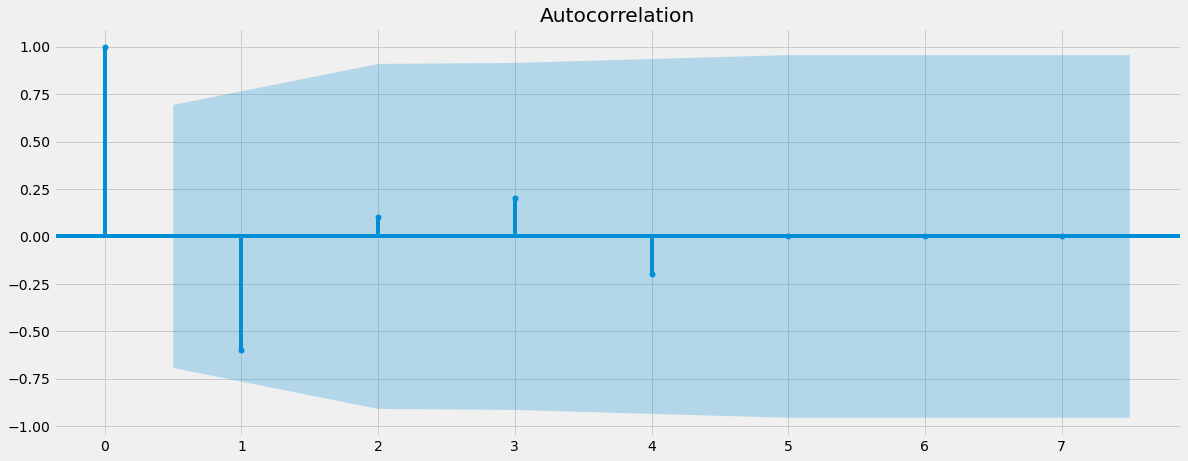

In [40]:
# Plotting the autocorrelation again

plot_acf(data_diff)
plt.show()

The autocorrelation plot looks similar. The stationary is strong due to no vertical lines going above the confidence interval.